# Nonogram Puzzle
_Combinatorial Optimization course, FEE CTU in Prague. Created by [Industrial Informatics Department](http://industrialinformatics.fel.cvut.cz)._

Nonogram (also called colored puzzle) is a puzzle, which originated in Japan in 1987 (see the [wiki](https://en.wikipedia.org/wiki/Nonogram)). The goal is to color the individual cells of the grid while respecting the hints given for each row and column. In a sense, the solving process is quite similar to, e.g., sudoku. However, the outcome is usually quite more rewarding, since the result of the puzzle is an image. See the illustration below.

![Nonograms promo](./nonogram_promo_bw.jpg)

If you are interested in solving the nonograms by hand, visit, e.g., [nonograms.org](https://www.nonograms.org/), where you will find many amusing instances of the problem.

**The goal of this exercise is to develop a solver**, which will be able to solve the nonograms automatically. There exists black-and-white nonograms as well as colored ones. Since you have nearly finished the whole semester of the Combinatorial Optimization, we will try the more general variant (i.e., the colored nonograms) directly.

Note that the nonogram puzzle is NP-complete, see [NP-completeness Results for NONOGRAM via Parsimonious Reductions (1996)](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.57.5277). Despite of that, there exist some approaches/models, that might be used to solve small (or medium) size instances of the problem more-or-less efficiently, see [the survey](https://webpbn.com/survey/).

This time, it is completely up to you, which approach you will use to solve the puzzle. Surely, you should be able to implement the ILP model of the problem (which is also the approach that we have been using while preparing this notebook), but it is only one of many possibilities. Some of you might have already encountered the nonogram puzzle during the [ZUI course](https://cw.fel.cvut.cz/b182/courses/b4b36zui/uloha2). There, you have probably implemented a simple brute-force constraints satisfaction solver (maybe including the AC-3 for pruning). If you have never heard about the constraints satisfaction problem (CP), you may look into the [last lecture of the KO course](https://rtime.felk.cvut.cz/~hanzalek/KO/cp_e.pdf), or go through the [pages of prof. Bartak from MFF](http://ktiml.mff.cuni.cz/~bartak/podminky/), who has been teaching the CP for years.

## Input 

You are given two numbers `n_row` and `n_col` representing the number of rows and columns of the grid.
For each row (column) you are given a list of block sizes (`row_sizes`, `col_sizes`), and list of the colors corresponding to the blocks (`row_colors`, `col_colors`). The inidividual colors are represented by integer numbers (1, 2, etc.). The block sizes are positive numbers.


## Goal

The goal is to assign the blocks to the individual cells of the grid while respecting the order of the blocks and their colors. Every two consecutive blocks of the same color in each row (column) need to be separated by at least one space (empty cell); if the two blocks do not have the same color, there does not need to be a space in between.

## Output

You should produce matrix `M` (indexed `M[row][column]`) containing 0 if the corresponding cell is empty, or positive integer corresponding to the color of the block occupying the cell. We have prepared a visualization function, which will take your matrix `M` and color map (mapping integers to strings representing the colors) and show you the image.


In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def draw_solution(matrix, color_map):
    """
    Function to draw the solution.
    First argument is the solution matrix M
    Second argument is the mapping from color (numbers) to strings (representing colors)
    """
    def get_coords(ir, ic):
        return (ic*SIZE, -(ir+1)*SIZE)
    
    n_rows = len(matrix)
    n_cols = len(matrix[0])
    SIZE = 10
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    patches = []
    
    for i_row in range(n_rows):
        for i_col in range(n_cols):
            if not matrix[i_row][i_col]:
                clr = "white"
            else:
                clr = color_map[matrix[i_row][i_col]]
            rect = Rectangle(get_coords(i_row, i_col), SIZE, SIZE, fill=True, color=clr)
            ax.add_patch(rect)

    ax.set_xlim(0,n_rows*SIZE)
    ax.set_ylim(-n_cols*SIZE,0)
    plt.axis('equal')
    plt.axis('off')    
    plt.show()

## Hints for an ILP modeling

**Skip this section if you want to think about the model yourself.**

A simple ILP model might include

- integer variable for each cell representing the color of the cell (0 = empty)
- binary variable for each cell and each row (column) block indicacting if the row (column) block "starts" in this cell (i.e., its leftmost/topmost part is in this cell)

The "hard work" is then to link the variables correctly to make the model work.

## Instances

In [384]:
# Simple 5x5, might be useful for debugging
n_row = 5
n_col = 5
row_sizes = [[2], [1, 1], [1, 1], [1, 3], [3]]
col_sizes = [[4],    [1],    [2],    [2], [4]]
row_colors = [[1], [1, 1], [1, 1],  [1, 1], [1]]
col_colors = [[1],    [1],    [1],     [1], [1]]
color_map = {1: "black"}

In [368]:
# dino from ZUI
n_row = 20
n_col = 30
row_sizes = [[6, 1], [3, 4, 1], [9, 2], [2, 2, 3, 2], [1, 2, 3, 3], [2, 5, 4], [10, 5], [15], [13], [10], [8], [2, 7], [2, 2, 5], [2, 5], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]
col_sizes = [[2], [2], [2, 1], [3, 2], [5], [1, 2], [3], [3], [4], [5], [5, 1], [5, 2], [7, 1], [6, 2], [7], [6, 1], [8, 2], [9, 2], [12, 1], [8, 2, 2], [3, 4, 2], [4, 4], [3, 2], [4], [3], [3], [2], [2], [2], [3]]
row_colors = [[1, 1], [1, 1, 1], [1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1], [1, 1], [1], [1], [1], [1], [1, 1], [1, 1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]
col_colors = [[1], [1], [1, 1], [1, 1], [1], [1, 1], [1], [1], [1], [1], [1, 1], [1, 1], [1, 1], [1, 1], [1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1, 1], [1, 1, 1], [1, 1], [1, 1], [1], [1], [1], [1], [1], [1], [1]]
color_map = {1: "black"}

In [315]:
# krtek - you might remember it from ZUI
# Note that by the brute-force + AC3, the solution was obtained in about 90s (as noted in the original solution).
# -> Can you achieve a better result?
n_row = 40
n_col = 40
row_sizes = [[2], [3, 4], [2, 2, 7], [3, 2, 2, 6, 1, 1], [9, 6, 1, 1, 2], [8, 6, 1, 1, 1, 1, 2], [7, 7, 1, 1, 1, 2, 2], [9, 8, 1, 3, 2], [9, 15, 2, 4], [8, 7, 2, 5, 3, 5], [6, 7, 3, 4, 2, 5], [5, 1, 7, 4, 4, 6], [4, 3, 7, 6, 2, 7], [2, 5, 6, 2, 2, 2, 2, 7], [6, 7, 1, 3, 1, 2, 7], [7, 7, 1, 3, 1, 2, 6], [14, 2, 1, 2, 2, 1, 6], [14, 5, 2, 4, 4], [13, 5, 9, 3], [12, 5, 9, 2], [11, 5, 9], [10, 5, 9], [8, 6, 8], [7, 6, 7], [6, 7, 6], [7, 8, 2], [7, 8, 2], [6, 9, 2], [6, 9, 2], [7, 9, 2], [7, 9, 2], [7, 9, 2], [7, 8, 3], [8, 7, 2], [7, 6, 3], [9, 3, 4], [15], [5, 9, 3], [7, 3, 2, 5], [8, 1, 1, 5]]
col_sizes = [[2], [3, 3], [4, 3], [10], [2, 10], [14], [12, 3], [8, 6], [8, 8], [4, 8], [8, 2], [8, 5, 3], [8, 12, 3], [5, 21, 3], [31, 3], [33, 3], [35, 2], [36, 1], [25, 6, 7], [22, 11, 4], [8, 5, 8, 13, 3], [3, 2, 27, 2], [2, 2, 2, 3, 3, 20, 3], [3, 3, 4, 2, 4, 19, 4], [1, 2, 4, 2, 2, 19, 3, 2], [1, 5, 22, 3, 3], [21, 7, 5, 3], [3, 2, 25, 3], [3, 15, 2], [2, 7], [8], [8], [8], [5, 6], [14, 4], [16], [12], [11], [8], [4]]
row_colors = [[1], [1, 2], [1, 1, 2], [1, 1, 1, 2, 2, 2], [1, 2, 3, 2, 1], [1, 2, 2, 3, 2, 2, 1], [1, 2, 2, 3, 2, 2, 1], [1, 2, 2, 2, 1], [1, 2, 4, 1], [1, 2, 3, 2, 4, 1], [1, 2, 3, 2, 4, 1], [1, 2, 2, 3, 2, 1], [1, 2, 2, 3, 2, 1], [1, 2, 2, 3, 2, 3, 2, 1], [2, 2, 3, 2, 3, 2, 1], [2, 2, 3, 2, 3, 2, 1], [2, 3, 2, 3, 2, 2, 1], [2, 3, 2, 2, 1], [2, 3, 2, 1], [2, 3, 2, 1], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2, 3, 2], [2], [1, 2, 1], [1, 2, 2, 1], [1, 2, 2, 1]]
col_colors = [[1], [1, 1], [1, 1], [1], [1, 1], [1], [1, 2], [1, 2], [1, 2], [1, 2], [2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 1], [2, 1], [2, 1], [2, 1], [2, 3, 2], [2, 3, 2], [2, 3, 2, 3, 2], [2, 2, 3, 2], [2, 2, 2, 3, 2, 3, 2], [2, 3, 2, 3, 2, 3, 2], [2, 2, 2, 3, 2, 3, 2, 1], [2, 2, 3, 2, 1], [2, 3, 2, 1], [2, 4, 2, 1], [4, 2, 1], [4, 2], [2], [2], [2], [1, 2], [1, 2], [1], [1], [1], [1], [1]]
color_map = {1: "black", 2: "brown", 3: "gray", 4: "red"}


In [375]:
# The best friend (#32431 nonograms.org)
n_row = 42
n_col = 45
row_sizes = [[39], [2,2], [2,33,2], [2,31,2], [2,29,2], [2,29,2], [2,31,2], [2,5,4,2], [2,4,3,2], [2,2,1,1,2,2], [2,2,3,3,2,2], [2,2,1,3,2,1,2,2], [2,3,5,1,1,1,1,4,2,2], [2,3,5,1,1,1,1,2,1,2,2,2,2,2,2], [2,2,3,1,1,1,2,1,1,2,2,2,4,1,1,2], [1,2,1,1,1,1,1,1,2,1,2,2,1,5,2,2,1], [1,2,3,9,4,1,2,1,4,2,2,1], [1,2,1,5,1,1,1,1,1,1,1,1,2,1,3,2,2,1], [1,2,3,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,2,1], [1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,3,1,1], [1,1,1,4,4,1,1,1,1,1,1,1,2,1,2,1,1,1,2,1,1,1], [1,1,3,2,7,1,1,1,2,1,2,1,1,2,2,1,1], [1,2,3,1,2,1,2,1,1,1,5,1,1,2,1,1,3,1,1,1], [1,2,2,3,1,1,2,1,1,1,1,3,1,1,2,1,1,3,1,2,1], [1,2,1,1,3,1,1,1,1,1,1,1,2,2,1,6,2,1], [1,3,1,1,3,1,1,2,1,1,1,4,7,3,1], [2,2,1,1,2,1,1,2,1,1,1,3,2,1,1,1,2,1,2,2], [2,2,1,2,1,1,2,1,1,2,3,1,1,1,2,1,3,2], [2,3,6,7,1,5,2,3,2], [2,2,1,1,1,1,10,1,2,2,2], [2,3,2,1,1,1,1,1,4,3,2], [2,3,1,1,1,1,3,2,3,2], [2,15,4,2,3,9,2], [2,5,13,1,3,7,2], [2,8,8,5,6,2], [2,6,2,7,5,5,2], [2,5,2,8,3,5,2], [2,5,6,3,5,2], [2,21,2], [3,17,3], [4,4], [21]]
col_sizes = [[17], [5,5], [4,11,4], [3,3,7,7,3], [4,2,5,1,6,2], [1,4,6,1,4,1,2], [1,1,2,3,3,2,2,2,2], [1,2,3,1,2,2,1,1,1,1,3,2], [1,7,3,5,1,1,1,1,4,2], [1,6,1,3,3,3,1,3,5,2], [1,6,5,2,5,1,1,6,2], [1,5,5,2,2,4,1,1,1,4,2], [1,5,3,3,2,1,2,1,1,1,1,7,2], [1,5,2,2,1,1,1,1,1,2,1,7,2], [1,5,2,1,2,1,1,1,1,1,1,1,3,3,1], [1,5,1,1,1,3,1,1,2,1,1,1,1,2,2,2,1], [1,5,2,1,1,2,1,1,1,1,1,2,1,2,2,2,1], [1,5,2,1,1,1,2,1,2,1,1,1,1,3,3,1], [1,5,4,1,1,2,1,4,2,2,8,1], [1,5,1,1,1,1,1,1,1,2,5,2,1,1,8,1], [1,5,1,1,3,1,1,1,1,3,2,1,1,1,1,1,7,1], [1,5,1,1,1,1,1,1,1,1,1,4,2,1,1,1,1,1,7,1], [1,5,2,2,2,1,1,1,1,2,2,2,1,1,7,1], [1,5,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,4,2,1], [1,5,1,2,1,1,1,1,1,2,1,3,1,1,1,8,1], [1,5,2,1,1,2,2,1,1,1,1,1,4,1], [1,5,1,1,1,2,1,1,1,1,3,3,1], [1,5,1,1,1,1,1,1,2,1,1,1,3,2,1], [1,5,3,1,4,1,1,1,1,5,2,1], [1,5,1,2,3,2,2,1,5,2,1], [1,5,2,2,2,1,2,3,3,1], [1,5,1,2,1,2,1,1,2,1,3,2], [1,5,1,2,1,2,1,1,1,1,1,7,2], [1,5,1,1,1,2,1,1,1,1,1,1,2,6,2], [1,5,1,1,1,3,1,1,2,1,1,1,2,6,2], [1,6,1,1,1,2,1,1,2,1,4,5,2], [1,6,1,1,3,1,1,2,1,2,4,2], [1,2,3,1,1,2,1,1,1,1,1,3,2], [1,1,2,3,1,2,1,1,2,2,2,2], [1,4,4,1,1,1,3,5,1,2], [4,2,4,2,1,6,2], [3,3,7,6,3], [4,11,4], [5,5], [17]]
row_colors = [[1], [1,1], [1,2,1], [1,2,1], [1,2,1], [1,2,1], [1,2,1], [1,2,2,1], [1,2,2,1], [1,2,2,2,2,1], [1,2,2,2,2,1], [1,2,2,2,4,2,2,1], [1,2,2,4,7,4,3,4,2,1], [1,2,2,2,4,7,4,6,3,4,5,6,4,2,1], [1,2,2,4,6,4,6,4,3,4,5,6,7,4,2,1], [1,2,2,4,5,4,5,4,5,3,4,5,6,7,4,2,1], [1,2,2,4,3,4,5,6,7,4,2,1], [1,2,2,4,5,5,5,7,5,6,5,4,5,6,7,4,2,1], [1,2,4,7,5,7,5,5,5,7,5,6,5,4,5,6,7,4,2,2,1], [1,2,4,6,5,6,5,7,5,7,5,7,5,6,5,3,4,5,6,7,4,2,2,1], [1,2,2,4,5,6,5,6,5,6,5,6,5,3,4,5,6,7,4,2,2,1], [1,2,4,6,5,6,5,6,5,3,4,5,6,7,4,2,1], [1,2,4,5,6,4,3,4,5,4,5,4,3,4,5,6,7,4,2,1], [1,2,4,5,4,3,1,3,4,5,4,5,4,3,4,5,6,7,4,2,1], [1,2,3,4,5,3,1,3,1,3,5,4,5,4,3,4,2,1], [1,2,3,4,5,3,2,3,2,3,5,4,3,2,1], [1,2,3,4,5,4,3,2,3,4,5,4,3,4,5,6,7,3,2,1], [1,2,3,4,5,4,3,4,5,4,3,4,5,6,7,3,2,1], [1,2,3,4,3,3,2,2,1], [1,2,3,5,4,3,3,2,2,2,1], [1,2,3,3,4,5,6,3,2,2,1], [1,2,3,6,7,3,2,2,2,1], [1,1,3,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1,1], [1,1,1,1,1,1], [1,1,1], [1,1,1], [1,1], [1]]
col_colors = [[1], [1, 1], [1, 2, 1], [1, 1, 2, 2, 1], [1, 1, 2, 2, 2, 1], [1, 1, 2, 2, 2, 1, 1], [1, 2, 1, 2, 2, 3, 2, 1, 1], [1, 2, 2, 2, 4, 3, 3, 5, 3, 2, 1, 1], [1, 2, 2, 4, 3, 3, 4, 3, 1, 1], [1, 2, 2, 2, 4, 5, 4, 3, 1, 1], [1, 2, 2, 4, 5, 4, 3, 1, 1], [1, 2, 2, 4, 6, 5, 4, 3, 1, 1, 1], [1, 2, 2, 4, 6, 4, 3, 4, 5, 4, 3, 1, 1], [1, 2, 4, 5, 4, 3, 1, 2, 3, 4, 3, 1, 1], [1, 2, 4, 6, 5, 3, 1, 3, 2, 3, 4, 3, 1, 1, 1], [1, 2, 2, 4, 7, 5, 3, 1, 3, 2, 3, 4, 3, 1, 1, 1, 1], [1, 2, 4, 5, 6, 5, 4, 3, 1, 2, 3, 4, 3, 1, 1, 1, 1], [1, 2, 4, 7, 5, 6, 5, 4, 3, 4, 5, 4, 3, 1, 1, 1], [1, 2, 4, 5, 7, 5, 4, 5, 4, 3, 1, 1], [1, 2, 4, 6, 5, 4, 5, 5, 6, 5, 4, 3, 4, 3, 1, 1], [1, 2, 4, 7, 4, 5, 7, 5, 6, 5, 4, 3, 3, 5, 6, 3, 1, 1], [1, 2, 4, 7, 4, 6, 5, 4, 5, 5, 6, 5, 4, 3, 3, 6, 7, 3, 1, 1], [1, 2, 4, 6, 4, 5, 7, 5, 6, 5, 4, 3, 3, 3, 1, 1], [1, 2, 3, 6, 4, 5, 4, 5, 7, 5, 6, 5, 4, 3, 4, 3, 3, 1, 1, 1], [1, 2, 2, 3, 5, 4, 7, 5, 6, 5, 4, 3, 4, 5, 3, 1, 1], [1, 2, 3, 5, 6, 5, 3, 3, 5, 6, 3, 1, 1, 1], [1, 2, 3, 6, 5, 3, 3, 6, 7, 3, 1, 1, 1], [1, 2, 2, 3, 5, 4, 3, 3, 7, 3, 2, 1, 1, 1, 1], [1, 2, 2, 3, 4, 3, 7, 3, 2, 1, 1, 1], [1, 2, 2, 4, 5, 4, 3, 2, 1, 1, 1], [1, 2, 4, 5, 6, 5, 4, 1, 1, 1], [1, 2, 4, 5, 6, 7, 6, 5, 4, 1, 1, 1], [1, 2, 4, 5, 6, 7, 4, 7, 6, 5, 4, 1, 1], [1, 2, 4, 5, 6, 7, 4, 4, 7, 6, 5, 4, 2, 1, 1], [1, 2, 4, 5, 6, 7, 4, 4, 7, 6, 4, 2, 2, 1, 1], [1, 2, 4, 5, 6, 7, 4, 4, 7, 4, 2, 1, 1], [1, 2, 4, 6, 7, 4, 4, 7, 4, 2, 1, 1], [1, 2, 2, 4, 6, 7, 4, 4, 7, 4, 2, 1, 1], [1, 2, 1, 2, 4, 7, 4, 2, 4, 2, 1, 1], [1, 1, 2, 4, 7, 4, 2, 2, 1, 1], [1, 1, 2, 4, 2, 2, 1], [1, 1, 2, 2, 1], [1, 2, 1], [1, 1], [1]]
color_map = {1: "c", 2: "paleturquoise", 3: "black", 4: "maroon", 5: "orangered", 6: "darkorange", 7: "yellow"}


In [381]:
# The riddle, can you solve it?
n_row = 30
n_col = 29
row_sizes = [[7, 1, 1, 1, 1, 2, 7], [1, 1, 1, 1, 4, 1, 1], [1, 3, 1, 1, 1, 1, 1, 3, 1], [1, 3, 1, 1, 2, 4, 1, 3, 1], [1, 3, 1, 1, 2, 1, 1, 3, 1], [1, 1, 3, 2, 1, 1, 1], [7, 1, 1, 1, 1, 1, 1, 1, 7], [1, 1, 2], [3, 5, 1, 1, 1, 2, 1], [3, 1, 1, 1, 3, 2, 1, 1, 1, 1], [1, 5, 3, 1, 1, 1, 3, 3], [1, 1, 4, 4, 1, 1, 1, 1], [3, 2, 1, 1, 1, 1, 1, 2], [3, 1, 2, 2, 1, 1, 3, 1, 1], [3, 3, 2, 1, 3, 1, 1, 2], [2, 2, 1, 2, 1, 5, 1, 1], [3, 7, 1, 2, 3, 1, 2], [1, 1, 2, 3, 2, 5, 2, 1], [1, 2, 1, 2, 2, 1, 1, 3, 2], [1, 1, 1, 4, 1, 1, 1, 2, 1], [1, 2, 1, 4, 1, 1, 6], [1, 1, 1, 3, 1, 3], [7, 2, 1, 4, 1, 2, 2], [1, 1, 4, 3, 2, 2, 1], [1, 3, 1, 1, 1, 1, 2, 5, 1], [1, 3, 1, 3, 2, 2, 3], [1, 3, 1, 1, 3, 1, 4, 3, 1], [1, 1, 2, 4, 1, 2, 3, 1], [7, 2, 1, 1, 1, 2, 3, 2], [1] ]
col_sizes = [[7, 2, 4, 1, 1, 7], [1, 1, 3, 5, 1, 1, 1], [1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1], [1, 3, 1, 1, 1, 1, 3, 1], [1, 3, 1, 3, 1, 2, 1, 3, 1], [1, 1, 1, 3, 4, 1, 1], [7, 1, 1, 1, 1, 1, 1, 1, 7], [9, 1], [1, 1, 3, 2, 1, 3, 5, 3], [1, 2, 1, 1, 1, 3, 1, 2, 2], [1, 2, 7, 2, 2, 1], [1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1], [1, 4, 4, 4, 4], [1, 2, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 4, 4, 3], [1, 1, 1, 2, 1, 1, 1], [1, 2, 1, 2, 2, 3, 1], [2, 1, 3, 2, 2, 2, 6], [2, 1, 1, 1, 1, 2, 2, 1], [1, 1, 1, 1, 1, 1, 4, 3], [1, 1, 1, 2, 2, 1, 1, 6, 3], [1, 6, 1, 1], [7, 6, 6, 1, 1, 2], [1, 1, 1, 2, 1, 1, 5], [1, 3, 1, 2, 10], [1, 3, 1, 1, 6, 1, 2, 1, 1], [1, 3, 1, 1, 1, 1, 1, 1], [1, 1, 3, 3, 2, 2, 1, 2], [7, 2, 3, 3, 6, 1]]
row_colors = [[1, 2, 1, 2, 3, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 3, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 3, 1, 1, 1], [1, 1, 3], [1, 1, 1, 3, 1, 1, 1], [1, 1, 1, 1, 1, 3, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [2], ]
col_colors = [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1], [2, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 3, 1, 1, 1, 1, 1], [1, 3, 3, 1, 1, 1, 1], [1, 3, 1, 3, 1, 1, 1, 1], [1, 3, 1, 1, 1, 1, 1, 1], [1, 3, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1] ]
color_map = {1: "black", 2: "white", 3: "black"}

## Solver

In [1]:
# TODO : implement your solver here

## Visualize solution

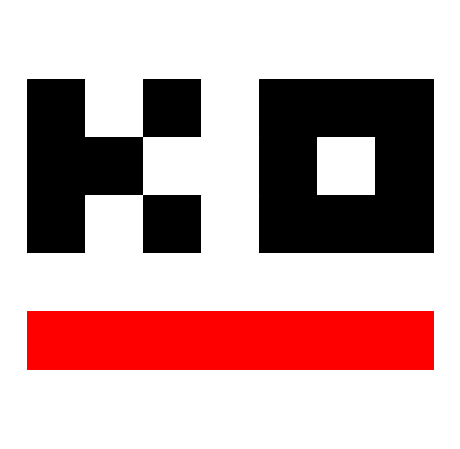

In [8]:
# Just call the function `draw_solution`, first argument is the matrix M, the second is the color map
draw_solution([[1,0,1,0,1,1,1],[1,1,0,0,1,0,1],[1,0,1,0,1,1,1],[0,0,0,0,0,0,0],[2,2,2,2,2,2,2]], {1: "black", 2: "red"})